<a href="https://colab.research.google.com/github/nicoladainese96/RelationalDeepRL/blob/master/BoxWorldTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
colab = True

if colab:
    from google.colab import drive
    drive.mount('/content/gdrive')
    !git clone https://github.com/deepmind/pycolab.git
    !git clone https://github.com/nicoladainese96/RelationalModule.git
    !pip install pycolab

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Cloning into 'pycolab'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 218 (delta 2), reused 10 (delta 2), pack-reused 205
Receiving objects: 100% (218/218), 461.22 KiB | 644.00 KiB/s, done.
Resolving deltas: 100% (120/120), done.
Cloning into 'RelationalModule'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: C

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from RelationalModule import ActorCritic
from RelationalModule import train_agent as train
from importlib import reload

In [4]:
reload(train)

<module 'RelationalModule.train_agent' from '/content/RelationalModule/train_agent.py'>

In [0]:
game_params = dict(grid_size=12,
                solution_length=[1],
                num_forward = [1], # number of distractors
                num_backward=[0], # just set to 0 for now
                branch_length=1 # length of forward distractors
               )

In [6]:

HPs = dict(action_space=4,
           lr=1e-2,
           gamma=0.99,
           TD=True,
           twin=True,
           n_steps = 3
           )
if colab:
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'

print('device: ', HPs['device'])  
agent = ActorCritic.BoxWorldA2C(**HPs)

device:  cuda


In [7]:
%%time
results = train.train_boxworld(agent, game_params, n_episodes = 10, return_agent=True)
score, asymptotic_score, asymptotic_std, trained_agent, time_profile = results

/usr/local/lib/python3.6/dist-packages/pycolab/ascii_art.py:318: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  art = np.vstack(np.fromstring(line, dtype=np.uint8) for line in art)


Time playing the episode: 0.88 s
Episode 1 - reward: 0
Time updating the agent: 0.57 s
Time playing the episode: 0.38 s
Episode 2 - reward: 0
Time updating the agent: 0.51 s
Time playing the episode: 0.37 s
Episode 3 - reward: 0
Time updating the agent: 0.51 s
Time playing the episode: 0.37 s
Episode 4 - reward: 0
Time updating the agent: 0.51 s
Time playing the episode: 0.37 s
Episode 5 - reward: 0
Time updating the agent: 0.51 s
Time playing the episode: 0.38 s
Episode 6 - reward: 0
Time updating the agent: 0.50 s
Time playing the episode: 0.40 s
Episode 7 - reward: 0
Time updating the agent: 0.50 s
Time playing the episode: 0.39 s
Episode 8 - reward: 0
Time updating the agent: 0.50 s
Time playing the episode: 0.37 s
Episode 9 - reward: 0
Time updating the agent: 0.50 s
Time playing the episode: 0.37 s
Episode 10 - reward: 0
Time updating the agent: 0.51 s
CPU times: user 8.25 s, sys: 630 ms, total: 8.88 s
Wall time: 9.43 s


On my PC:

 Average time for playing an episode: 1.97428691 <br>
 Average time for updating the agent: 26.46678982

 On Colab notebook:

 Average time for playing an episode:  1.11658633 <br>
 Average time for updating the agent: 18.63836179


With GPU

Average time for playing an episode: 0.43020332 <br>
Average time for updating the agent: 0.64481306


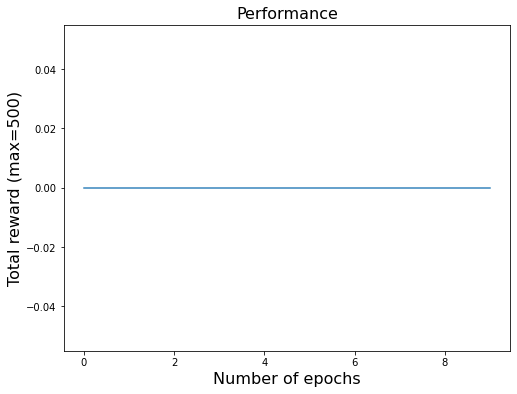

In [8]:
plt.figure(figsize=(8,6))
n_epochs = np.arange(len(score))
plt.plot(n_epochs, score, alpha=0.9)
plt.title("Performance", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Total reward (max=500)", fontsize=16)
plt.show()

In [25]:
%cd '~'

/root


In [29]:
parent_dir = "/content/gdrive/My Drive/Colab Notebooks"
%cd "{parent_dir}"

/content/gdrive/My Drive/Colab Notebooks


In [30]:
%ls

6_transformer.ipynb    cartpole_HP_tuning.ipynb  Parametri/
BoxWorldTesting.ipynb  checkpoint/               RelationalDeepRL/


In [26]:
!if [ ! -d "RelationalDeepRL" ]; then git clone https://github.com/nicoladainese96/RelationalDeepRL.git; fi

Cloning into 'RelationalDeepRL'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 43 (delta 16), reused 38 (delta 11), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [27]:
%ls

RelationalDeepRL/


In [28]:
%cp BoxWorldTesting.ipynb RelationalDeepRL/

cp: cannot stat 'BoxWorldTesting.ipynb': No such file or directory


In [31]:
%cd RelationalDeepRL/



/content/gdrive/My Drive/Colab Notebooks/RelationalDeepRL


In [0]:
!git remote set-url origin https://github.com/nicoladainese96/RelationalDeepRL.git

In [24]:
!git config --global user.email "nicola.dainese96@gmail.com"
!git config --global user.name "nicoladainese96"
!git push origin master

fatal: could not read Username for 'https://github.com': No such device or address
